# CPSC 330 - Applied Machine Learning 

## Homework 5: Evaluation metrics
### Associated lectures: Lectures 9, 10 

**Due date: Tuesday, June 07, 2022 at 18:00**

## Imports

In [1]:
import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## Instructions 
<hr>
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2022s/blob/master/docs/homework_instructions.md).

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

<br><br>

## Exercise 1: Precision, recall, and f1 score by hand <a name="1"></a>
<hr>

Consider the problem of predicting whether a patient has a disease or not. Below are confusion matrices of two machine learning models: Model A and Model B.

- Model A confusion matrix

In [2]:
cm_A = pd.DataFrame(
    [[3, 10],
     [1, 106]],
    columns=["Predicted disease", "Predicted no disease"],
    index=["Actual disease", "Actual no disease"])

cm_A

,Predicted disease,Predicted no disease
Actual disease,3,10
Actual no disease,1,106


- Model B confusion matrix

In [3]:
cm_B = pd.DataFrame(
    [[8, 5],
     [12, 95]],
    columns=["Predicted disease", "Predicted no disease"],
    index=["Actual disease", "Actual no disease"])

cm_B

,Predicted disease,Predicted no disease
Actual disease,8,5
Actual no disease,12,95


### 1.1 Positive vs. negative class 
rubric={points:2}

**Your tasks:**

Precision, recall, and f1 score depend upon which class is considered "positive", that is the thing you wish to find. In the example above, which class is likely to be the "positive" class? Why? 

'Disease' is likely to be the positive class. We are most likely interested in detecting diseases, not detecting healthy people.

<br><br>

### 1.2 Accuracy
rubric={points:2}

**Your tasks:**

Calculate accuracies for Model A and Model B. 

We'll store all metrics associated with Model A and Model B in the `results_dict` below. 

In [4]:
results_dict = {"A": {}, "B": {}}

In [5]:
results_dict["A"]["accuracy"] = np.diag(cm_A).sum() / cm_A.sum().sum()
results_dict["B"]["accuracy"] = np.diag(cm_B).sum() / cm_B.sum().sum()

In [6]:
assert tests_hw5.ex1_2_1(
    results_dict["A"]["accuracy"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [7]:
assert tests_hw5.ex1_2_2(
    results_dict["B"]["accuracy"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [8]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.908333,0.858333


<br><br>

### 1.3 Which model would you pick? 
rubric={points:1}

**Your tasks:**

Which model would you pick simply based on the accuracy metric? 

A. It has a higher accuracy.

<br><br>

### 1.4 Precision, recall, f1-score
rubric={points:6}

**Your tasks:**

1. Calculate precision, recall, f1-score for Model A and Model B manually, without calling `scikit-learn` functions.

In [9]:
results_dict["A"]["precision"] = cm_A.iloc[0,0]/(cm_A.iloc[0,0] + cm_A.iloc[1,0])
results_dict["B"]["precision"] = cm_B.iloc[0,0]/(cm_B.iloc[0,0] + cm_B.iloc[1,0])
results_dict["A"]["recall"] = cm_A.iloc[0,0]/(cm_A.iloc[0,0] + cm_A.iloc[0,1])
results_dict["B"]["recall"] = cm_B.iloc[0,0]/(cm_B.iloc[0,0] + cm_B.iloc[0,1])
results_dict["A"]["f1"] = 2 * results_dict["A"]["precision"] * results_dict["A"]["recall"] / (results_dict["A"]["precision"] + results_dict["A"]["recall"])
results_dict["B"]["f1"] = 2 * results_dict["B"]["precision"] * results_dict["B"]["recall"] / (results_dict["B"]["precision"] + results_dict["B"]["recall"])

In [10]:
assert tests_hw5.ex1_4_1(
    results_dict["A"]["precision"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [11]:
assert tests_hw5.ex1_4_2(
    results_dict["B"]["precision"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [12]:
assert tests_hw5.ex1_4_3(
    results_dict["A"]["recall"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [13]:
assert tests_hw5.ex1_4_4(
    results_dict["B"]["recall"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [14]:
assert tests_hw5.ex1_4_5(
    results_dict["A"]["f1"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [15]:
assert tests_hw5.ex1_4_6(
    results_dict["B"]["f1"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


Show the dataframe with all results. 

In [16]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.908333,0.858333
precision,0.750000,0.400000
recall,0.230769,0.615385
f1,0.352941,0.484848


<br><br>

### 1.5 Discussion
rubric={points:4}

**Your tasks:**
1. Which metric is more informative in this problem? Why? 
2. Which model would you pick based on this information? 

1.  *Recall* is the most important when it comes to disease diagnosis because of how devastating a false negative can be for patient health.
2. *Model B* is better for this task.

<br><br>

### (Optional) 1.6 
rubric={points:1}

**Your tasks:**

Provide 4 to 5 example classification datasets (with links) where accuracy metric would be misleading. Discuss which evaluation metric would be more appropriate for each dataset. You may consider datasets we have used in this course so far. You could also look up datasets on Kaggle. 

For lung cancer diagnosis https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer, recall is more important.

For predicting top hits on Spotify https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019, precision is more important if a company is to search for a musician to sign. The dataset is imbalancedm and high accuracy can be achieved with a dummy classifier in this case, but a company would likely want high precision because they don't want to waste time with false positives.

For scam detection https://www.kaggle.com/datasets/amruthjithrajvr/recruitment-scam, recall is more important because false negatives can cause a lot of financial damage.

When buying a used car https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data, recall is more important to detect potential lemon cars that are worth significantly less than how they appear.

<br><br><br><br>

### Exercise 2: Classification evaluation metrics using `sklearn` <a name="2"></a>
<hr>

In general, when a dataset is imbalanced, accuracy does not provide the whole story. In class, we looked at credit card fraud dataset which is a classic example of an imbalanced dataset. 

Another example is customer churn datasets. [Customer churn](https://en.wikipedia.org/wiki/Customer_attrition) refers to the notion of customers leaving a subscription service like Netflix. In this exercise, we will try to predict customer churn in a dataset where most of the customers stay with the service and a small minority cancel their subscription. To start, please download the [Kaggle telecom customer churn dataset](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). Once you have the data, you should be able to run the following code:

The starter code below reads the data CSV as a pandas dataframe and splits it into 70% train and 30% test. 

Note that `churn` column in the dataset is the target. "True" means the customer left the subscription (churned) and "False" means they stayed.

> Note that for this kind of problem a more appropriate technique is something called survival analysis and we'll be talking about it later in the course. For now, we'll just treat it as a binary classification problem. 

In [17]:
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv", encoding="utf-8")
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)
train_df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1402,NE,70,415,421-8535,no,no,0,213.4,86,36.28,...,77,17.40,256.6,101,11.55,5.7,4,1.54,1,False
1855,WI,67,510,417-2265,no,no,0,109.1,134,18.55,...,76,12.10,91.2,86,4.10,10.9,5,2.94,2,False
633,NJ,122,415,327-9341,no,yes,34,146.4,104,24.89,...,103,7.62,220.0,91,9.90,15.6,4,4.21,2,False
1483,NV,107,510,419-9688,yes,no,0,234.1,91,39.80,...,105,13.86,282.5,100,12.71,10.0,3,2.70,1,False
2638,HI,105,510,364-8128,no,no,0,125.4,116,21.32,...,95,22.23,241.6,104,10.87,11.4,9,3.08,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,WY,126,408,339-9798,yes,no,0,197.6,126,33.59,...,112,20.95,285.3,104,12.84,12.5,8,3.38,2,False
3089,WV,70,510,348-3777,no,yes,30,143.4,72,24.38,...,92,14.45,127.9,68,5.76,9.4,4,2.54,3,False
1766,NJ,125,415,406-6400,no,no,0,182.3,64,30.99,...,121,11.88,171.6,96,7.72,11.6,7,3.13,2,False
1122,NE,159,415,362-5111,no,no,0,189.1,105,32.15,...,147,20.92,242.0,106,10.89,10.4,5,2.81,1,True


<br><br>

### 2.1 Distribution of target values
rubric={points:4}

**Your tasks:**

Examine the distribution of target values in the train split. Do you see class imbalance? If yes, do we need to deal with it? Why or why not? 

In [18]:
train_df['churn'].value_counts(normalize=True)

False    0.850407
True     0.149593
Name: churn, dtype: float64

In [19]:
train_df['churn'].value_counts()

False    1984
True      349
Name: churn, dtype: int64

There is a class imbalance. More than 85% of the customers stayed. But there are still 349 customers who left in the dataset, and that might be enough to prevent overfitting. But the imbalance undermines the validity of accuracy as a model evaluation metric.

<br><br>

### (Optional) 2.2 EDA 
rubric={points:1}

**Your tasks:**

Come up with **two** exploratory questions you would like to answer and explore those. Briefly discuss your results in 1-3 sentences.

You are welcome to use `pandas_profiling` (see Lecture 10) but you don't have to.

In [20]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(train_df, title="Pandas Profiling Report")
# profile

**Are people who use the phone service for longer during the day more likely to stay? The correlation (Pearson's r) is moderate between total day minutes and churn. It is not good enough a predictor for churn, but it does seem to indicate people who use the service more tend to leave. Maybe because they use the phone service for work.**

**Are people who use the customer service more likely to leave? Phik indicates there is a high correlation. Maybe people tend to leave after using customer service calls because they leave the service through customer service calls, and when their problems are not resolved through customer service.**

<br><br>

### 2.3 Column transformer 
rubric={points:10}

The code below creates `X_train`, `y_train`, `X_test`, `y_test` for you. 
In preparation for building a classifier, set up a `ColumnTransformer` that performs whatever feature transformations you deem sensible. This can include dropping features if you think they are not helpful. Remember that by default `ColumnTransformer` will drop any columns that aren't accounted for when it's created.

In each case, briefly explain your rationale with 1-2 sentences. You do not need an explanation for every feature, but for every group of features that are being transformed the same way. For example, "I am doing transformation X to the following categorical features: `a`, `b`, `c` because of reason Y," etc.

In [21]:
X_train = train_df.drop(columns=["churn"])
X_test = test_df.drop(columns=["churn"])

y_train = train_df["churn"]
y_test = test_df["churn"]

In [22]:
numeric_features = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total eve minutes', 
                    'total eve calls', 'total night minutes', 'total night calls', 'total intl minutes', 'total intl calls', 'customer service calls']
categorical_features = ['state', 'area code']
binary_features = ['international plan', 'voice mail plan']
drop_features = ['phone number', 'total day charge', 'total eve charge', 'total night charge', 'total intl charge']
target = "churn"

In [23]:
# from lecture 6
preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(handle_unknown="ignore", dtype=int, sparse=False), categorical_features),
    (OneHotEncoder(handle_unknown="ignore", drop="if_binary", sparse=False, dtype=int), binary_features),
    ("drop", drop_features),
)

No need for imputers since there is no missing value.
The numeric features above are scaled for logistic regression.

The categorical features, `state` and `area code`, are one-hot encoded.

The binary features, `international plan` and `voice mail plan`, are one-hot encoded with `drop='if_binary'` since there are only 2 distinct values for these features.

Phone numbers are unique, non-numeric and non-ordinal, and doesn't carry any information. Total day/eve/night/intl charges linearly correlated to total day/eve/night/intl minutes, and therefore redundant.

<br><br>

### 2.4 Visualizing the transformed data 
rubric={points:4}

Fit and transform your `ColumnTransformer` on your training set. Print the first 5 rows of the transformed data as a dataframe (not numpy array). See lecture 10 for code that can get you the new column names after transforming. 

In [24]:
X_train_processed = preprocessor.fit_transform(X_train, y_train)
preprocessor.named_transformers_.values()

new_columns = []

for tf in preprocessor.named_transformers_.values():
    if tf != 'drop':
        new_columns.extend(tf.get_feature_names_out())

X_train_enc = pd.DataFrame(
    preprocessor.transform(X_train), index=X_train.index, columns=new_columns
)

X_train_enc.head(5)

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,...,state_VT,state_WA,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan_yes,voice mail plan_yes
1402,-0.767893,-0.587624,0.618769,-0.721211,0.069871,-1.156734,1.088667,0.052115,-1.645501,-0.200722,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1855,-0.843585,-0.587624,-1.293778,1.655252,-1.167277,-1.207278,-2.162302,-0.720990,0.227019,0.198158,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
633,0.544113,1.900976,-0.609809,0.169963,-2.210130,0.157417,0.369287,-0.463288,1.919489,-0.200722,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1483,0.165650,-0.587624,0.998345,-0.473663,-0.754894,0.258506,1.597736,0.000574,-0.097071,-0.599603,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2638,0.115188,-0.587624,-0.994886,0.764078,1.195994,-0.246937,0.793839,0.206736,0.407069,1.793679,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [25]:
preprocessor.get_feature_names_out()

array(['standardscaler__account length',
       'standardscaler__number vmail messages',
       'standardscaler__total day minutes',
       'standardscaler__total day calls',
       'standardscaler__total eve minutes',
       'standardscaler__total eve calls',
       'standardscaler__total night minutes',
       'standardscaler__total night calls',
       'standardscaler__total intl minutes',
       'standardscaler__total intl calls',
       'standardscaler__customer service calls',
       'onehotencoder-1__state_AK', 'onehotencoder-1__state_AL',
       'onehotencoder-1__state_AR', 'onehotencoder-1__state_AZ',
       'onehotencoder-1__state_CA', 'onehotencoder-1__state_CO',
       'onehotencoder-1__state_CT', 'onehotencoder-1__state_DC',
       'onehotencoder-1__state_DE', 'onehotencoder-1__state_FL',
       'onehotencoder-1__state_GA', 'onehotencoder-1__state_HI',
       'onehotencoder-1__state_IA', 'onehotencoder-1__state_ID',
       'onehotencoder-1__state_IL', 'onehotencoder-1__sta

<br><br>

### 2.5 area code feature
rubric={points:4}

The original dataset had a feature called `area code`. Let's assume we encoded this feature with one-hot encoding.

1. The area codes were numbers to begin with. Why do we want to use one-hot encoding on this feature?
2. What were the possible values of `area code`? 
3. What new feature(s) were created to replace `area code`? 

1. Although they are numbers, they are in fact identifiers consisting of digits. Area codes are non-ordinal.
2. There are only 3 distinct values of `area code` in the dataset: [408, 415, 510].
3. A new feature is created for each unique area code in the training data.

In [26]:
preprocessor.named_transformers_['onehotencoder-1'].get_feature_names_out(categorical_features)

array(['state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA',
       'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL',
       'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
       'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO',
       'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE',
       'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY',
       'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI',
       'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV',
       'state_WY', 'area code_408', 'area code_415', 'area code_510'],
      dtype=object)

New features created for each unique area code in the training data: `area code_408`, `area code_415`, `area code_510`.

<br><br>

### 2.6 Dummy classifier
rubric={points:4}

**Your tasks:**

Create a `DummyClassifier`. Report the following scoring metrics via cross-validation: accuracy, precision, recall, f1-score. Briefly comment on your results, including any *warnings* the code produces (2 sentences max).

In [27]:
dummy = DummyClassifier()

# from Lecture 9
scoring = [
    "accuracy",
    "f1",
    "recall",
    "precision",
]  # scoring can be a string, a list, or a dictionary

pipeline = make_pipeline(preprocessor, dummy)

cv = pd.DataFrame(cross_validate(pipeline, X_train, y_train, cv=5, return_train_score=True, scoring=scoring))
cv

C:\Users\Kenny\miniconda3\envs\cpsc330\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kenny\miniconda3\envs\cpsc330\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kenny\miniconda3\envs\cpsc330\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kenny\miniconda3\envs\cpsc330\lib\site-packages\sklearn\metrics\_cl

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,0.014960,0.011489,0.850107,0.850482,0.0,0.0,0.0,0.0,0.0,0.0
1,0.009973,0.005984,0.850107,0.850482,0.0,0.0,0.0,0.0,0.0,0.0
2,0.007979,0.006642,0.850107,0.850482,0.0,0.0,0.0,0.0,0.0,0.0
3,0.012940,0.008976,0.851931,0.850027,0.0,0.0,0.0,0.0,0.0,0.0
4,0.011969,0.008948,0.849785,0.850562,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
y_train.value_counts()

False    1984
True      349
Name: churn, dtype: int64

Because the dummy classifier only predicts the most common target value, which is the negative class for these training folds, it never predicts any example as a positive, and thus the recall is zero, and hence the f1 is also zero for all.
Furthermore, the denominator of the precision (FP + TP) is also always zero, and causes a warning about 'division by zero'.

<br><br>

### 2.7 Logistic regression
rubric={points:8} 

**Your tasks:**

1. Train and score a logistic regression classifier on the dataset. 
2. Report the same metrics as in the previous part.
3. Are you satisfied with the results? Use your `DummyClassifier` results as a reference point. Discuss in a few sentences. 

In [29]:
lr = LogisticRegression()
lr.fit(X_train_enc, y_train)

LogisticRegression()

In [30]:
scoring = [
    "accuracy",
    "f1",
    "recall",
    "precision",
]  # scoring can be a string, a list, or a dictionary

pipeline_lr = make_pipeline(preprocessor, lr)

cv = pd.DataFrame(cross_validate(pipeline_lr, X_train, y_train, cv=5, return_train_score=True, scoring=scoring))
cv

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,0.037897,0.011968,0.869379,0.864416,0.371134,0.332454,0.257143,0.225806,0.666667,0.630000
1,0.040892,0.010970,0.852248,0.868167,0.273684,0.362694,0.185714,0.250896,0.520000,0.654206
2,0.045878,0.012966,0.850107,0.867095,0.255319,0.364103,0.171429,0.254480,0.500000,0.639640
3,0.041890,0.012963,0.869099,0.863953,0.371134,0.345361,0.260870,0.239286,0.642857,0.620370
4,0.056894,0.013963,0.839056,0.868773,0.242424,0.373402,0.171429,0.261649,0.413793,0.651786


The recall is very low; there are a lot of false negatives. This is still much better than the dummy model in terms of recall, f1, and precision. The accuracy is still similar to that of the dummy model due to class imbalance.

<br><br>

### 2.8 Logistic regression with `class_weight`
rubric={points:6}

**Your tasks:**

1. Set the `class_weight` parameter of your logistic regression model to `'balanced'` and report the same metrics as in the previous part. 
2. Do you prefer this model to the one in the previous part? Discuss your results in a few sentences.

In [31]:
lr_bal = LogisticRegression(class_weight='balanced')
pipeline_lr_bal = make_pipeline(preprocessor, lr_bal)
cv = pd.DataFrame(cross_validate(pipeline_lr_bal, X_train, y_train, cv=5, return_train_score=True, scoring=scoring))
cv

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,0.040893,0.014471,0.785867,0.770096,0.489796,0.498246,0.685714,0.763441,0.380952,0.369792
1,0.034906,0.009973,0.768737,0.771168,0.490566,0.504065,0.742857,0.777778,0.366197,0.372852
2,0.038896,0.010970,0.764454,0.774384,0.455446,0.511034,0.657143,0.788530,0.348485,0.378007
3,0.035004,0.011870,0.751073,0.778790,0.462963,0.516959,0.724638,0.789286,0.340136,0.384348
4,0.033937,0.011346,0.733906,0.786824,0.436364,0.531765,0.685714,0.810036,0.320000,0.395797


The accuracy got lower than the baseline dummy model, and the precision is also lower than the model from the previous. However, the (validation) recall and f1 improved with balanced class weight, but I still do not prefer this model to the one in the previous part because it produces too many false positives (low precision).

<br><br>

### 2.9 Hyperparameter optimization
rubric={points:10}

Now let's tune the hyperparameters of our `LogisticRegression` using `GridSearchCV` to maximize cross-validation f1 score. 

**Your tasks:**

1. Jointly optimize `C` (choose some reasonable values) and `class_weight` (`None` vs. `'balanced'`) with `GridSearchCV` and `scoring="f1"`. 
2. What values of `C` and `class_weight` are chosen and what is the best cross-validation f1 score?

In [32]:
param_grid = {
    "logisticregression__class_weight": [None, 'balanced'],
    "logisticregression__C": [0.001, 0.01, 0.1, 1.0, 10, 100],
}

grid_search = GridSearchCV(
    pipeline_lr, param_grid, cv=5, n_jobs=-1, return_train_score=True, scoring="f1"
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['account '
                                                                          'length',
                                                                          'number '
                                                                          'vmail '
                                                                          'messages',
                                                                          'total '
                                                                          'day '
                                                                          'minutes',
                                                                   

In [33]:
print(f'Best f1: {grid_search.best_score_:.5f}')

Best f1: 0.47787


In [34]:
print(f'Best C: {grid_search.best_params_["logisticregression__C"]}')
print(f'Best class_weight: "{grid_search.best_params_["logisticregression__class_weight"]}"')

Best C: 0.1
Best class_weight: "balanced"


<br><br>

### 2.10 Test results
rubric={points:10}

**Your tasks**
1. Evaluate the best model on the test set. In particular show each of the following on the test set:  
    - Confusion matrix. 
    - Classification report. 
    - Precision-recall curve with average precision score.     
    - ROC curve with AUC. 
3. Comment on the results.    

> Note that we are not doing it here but in real life, you would also plot confusion matrix, precision-recall curve, and ROC curve on validation data to examine errors and to choose a threshold which works for your operating point. 

In [35]:
best_lr = grid_search.best_estimator_
best_lr

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['account length',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total night minutes',
                                                   'total night calls',
                                                   'total intl minutes',
                                                   'total intl calls',
                                                   'customer service calls']),
                            

In [36]:
confusion_matrix(y_test, best_lr.predict(X_test))

array([[670, 196],
       [ 31, 103]], dtype=int64)

In [37]:
print(classification_report(
    y_test, best_lr.predict(X_test), target_names=["False", "True"]
))

              precision    recall  f1-score   support

       False       0.96      0.77      0.86       866
        True       0.34      0.77      0.48       134

    accuracy                           0.77      1000
   macro avg       0.65      0.77      0.67      1000
weighted avg       0.87      0.77      0.80      1000



Average precision of logistic regression: 0.457


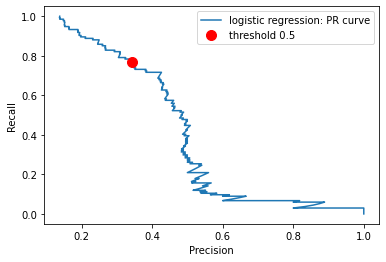

In [38]:
# From Lecture 9
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, thresholds = precision_recall_curve(
    y_test, best_lr.predict_proba(X_test)[:, 1]
)

ap_lr = average_precision_score(y_test, best_lr.predict_proba(X_test)[:, 1])
print("Average precision of logistic regression: {:.3f}".format(ap_lr))

plt.plot(precision, recall, label="logistic regression: PR curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.plot(
    precision_score(y_test, best_lr.predict(X_test)),
    recall_score(y_test, best_lr.predict(X_test)),
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best")


AUC for SVC: 0.823


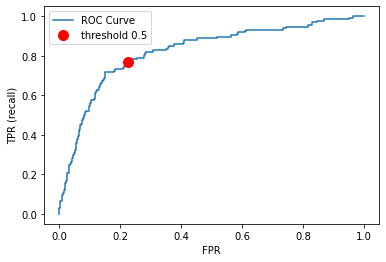

In [39]:
# adapted from Lecture 9

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

preds = best_lr.predict_proba(X_test)[:, 1]

roc_lr = roc_auc_score(y_test, preds)
print("AUC for SVC: {:.3f}".format(roc_lr))

fpr, tpr, thresholds = roc_curve(y_test, preds)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

default_threshold = np.argmin(np.abs(thresholds - 0.5))

plt.plot(
    fpr[default_threshold],
    tpr[default_threshold],
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best");

It looks as though we can't achieve both high recall and precision by moving the threshold. And high TPR can't be achieved without also increasing the FPR.

<br><br><br><br>

### Exercise 3: Regression metrics <a name="3"></a>
<hr> 


For this exercise, we'll use [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) from `sklearn datasets`. The code below loads the dataset.  

In [40]:
from sklearn.datasets import fetch_california_housing

housing_df = fetch_california_housing(as_frame=True).frame

fetch_california_housing(as_frame=True)### 3.1: Data spitting and exploration 
rubric={points:4}

**Your tasks:**

1. Split the data into train (80%) and test (20%) splits. 
2. Explore the train split. Do you need to apply any transformations on the data? If yes, create a preprocessor with the appropriate transformations. 
3. Separate `X` and `y` in train and test splits. 

In [41]:
print(fetch_california_housing(as_frame=True).DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [42]:
train_df, test_df = train_test_split(housing_df, test_size=0.2, random_state=123)

In [43]:
train_df.describe(include='all')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.870716,28.570918,5.422508,1.096515,1434.115734,3.064722,35.627757,-119.566976,2.069687
std,1.900132,12.582281,2.520931,0.491311,1130.309986,10.624706,2.134543,2.000519,1.154148
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.350000,0.149990
25%,2.562500,18.000000,4.430476,1.005825,789.000000,2.429013,33.930000,-121.800000,1.194000
50%,3.529400,29.000000,5.227170,1.048765,1170.000000,2.816122,34.250000,-118.490000,1.804000
75%,4.750375,37.000000,6.051005,1.099493,1735.000000,3.278954,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,28566.000000,1243.333333,41.950000,-114.310000,5.000010


In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 9950 to 19966
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       16512 non-null  float64
 1   HouseAge     16512 non-null  float64
 2   AveRooms     16512 non-null  float64
 3   AveBedrms    16512 non-null  float64
 4   Population   16512 non-null  float64
 5   AveOccup     16512 non-null  float64
 6   Latitude     16512 non-null  float64
 7   Longitude    16512 non-null  float64
 8   MedHouseVal  16512 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


In [45]:
std_scl = StandardScaler() # All features appear to be numeric, and require scaling for regression.

In [46]:
X_train = train_df.drop(columns=['MedHouseVal'])
y_train = train_df['MedHouseVal']
X_test = test_df.drop(columns=['MedHouseVal'])
y_test = test_df['MedHouseVal']

<br><br>

### 3.2 Baseline: DummyRegressor 
rubric={points:2}

**Your tasks:**
1. Carry out cross-validation using `DummyRegressor` with default scoring. 
2. What metric is used for scoring by default? 

In [47]:
dummy = DummyRegressor()
cv = pd.DataFrame(cross_validate(make_pipeline(std_scl, dummy), X_train, y_train, return_train_score=True))
cv

,fit_time,score_time,test_score,train_score
0,0.005016,0.001996,-0.000023,0.0
1,0.002992,0.001966,-0.000576,0.0
2,0.004008,0.000968,-0.000061,0.0
3,0.005959,0.002990,-0.000015,0.0
4,0.003020,0.000969,-0.000058,0.0


Accuracy is used by default.

<br><br>

### 3.3 Different regressors
rubric={points:8}

In this exercise, we are going to use [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) model which we haven't looked into yet. At this point you should feel comfortable using models with our usual ML workflow even if you don't know the details. We'll talk about `RandomForestRegressor` later in the course.  

The code below defines a custom scorer called `mape_scorer` and creates dictionaries for different regressors (`models`) and different scoring metrics (`score_types_reg`). 

**Your tasks:**

1. Using the `models` and the evaluation metrics `score_types_reg` in the code below, carry out cross-validation with each model, by passing the evaluation metrics to `scoring` argument of `cross_validate`. Use a pipeline with the model as an estimator if you are applying any transformations. 
2. Show results as a dataframe. 
3. Interpret the results. How do the models compare to the baseline? Which model seems to be performing well with different metrics? 


In [48]:
def mape(true, pred):
    return 100.0 * np.mean(np.abs((pred - true) / true))


# make a scorer function that we can pass into cross-validation
mape_scorer = make_scorer(mape, greater_is_better=False)

models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(),
}

score_types_reg = {
    "neg_mean_squared_error": "neg_mean_squared_error",
    "neg_root_mean_squared_error": "neg_root_mean_squared_error",
    "neg_mean_absolute_error": "neg_mean_absolute_error",
    "r2": "r2",
    "mape_scorer": mape_scorer,
}

In [49]:
# Adapted from Lecture 10
evaluation_metrics = {}
pipelines = {}

for name, model in models.items():
    pipelines[name] = make_pipeline(std_scl, model)
    evaluation_metrics[name] = pd.DataFrame(
        cross_validate(
            pipelines[name], X_train, y_train, return_train_score=True, scoring=score_types_reg
        )
    )

In [50]:
evaluation_metrics["Ridge"]

,fit_time,score_time,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_r2,train_r2,test_mape_scorer,train_mape_scorer
0,0.037897,0.002991,-0.543796,-0.523434,-0.737425,-0.723487,-0.537722,-0.530319,0.600728,0.604798,-32.879669,-31.565152
1,0.003990,0.003989,-0.523154,-0.526913,-0.723294,-0.725888,-0.538830,-0.531133,0.609386,0.603822,-31.382857,-31.924930
2,0.004987,0.003988,-0.530828,-0.524935,-0.728579,-0.724524,-0.529630,-0.533808,0.611168,0.603422,-31.636865,-31.937245
3,0.008978,0.003988,-0.526309,-0.526141,-0.725472,-0.725356,-0.534463,-0.532982,0.599991,0.606191,-31.977278,-31.841225
4,0.003989,0.003988,-1.293077,-0.520423,-1.137135,-0.721403,-0.536574,-0.528700,-0.012554,0.613268,-32.021087,-31.546342


In [51]:
evaluation_metrics["Random Forest"]

,fit_time,score_time,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_r2,train_r2,test_mape_scorer,train_mape_scorer
0,6.359130,0.079935,-0.254950,-0.038349,-0.504926,-0.195829,-0.335222,-0.127173,0.812807,0.971046,-19.742811,-7.205316
1,6.464156,0.081782,-0.259065,-0.036013,-0.508984,-0.189770,-0.330376,-0.123167,0.806568,0.972923,-17.908265,-6.972989
2,6.328905,0.080784,-0.258229,-0.036909,-0.508163,-0.192117,-0.330705,-0.125547,0.810847,0.972116,-18.455055,-7.072868
3,6.240307,0.077792,-0.281374,-0.036363,-0.530447,-0.190690,-0.344333,-0.124293,0.786148,0.972783,-19.323079,-6.980604
4,6.454402,0.095770,-0.262110,-0.036436,-0.511966,-0.190882,-0.331406,-0.124322,0.794753,0.972924,-18.867800,-7.004195


In [52]:
pd.DataFrame(cross_validate(make_pipeline(std_scl, dummy), X_train, y_train, return_train_score=True, scoring=score_types_reg))

,fit_time,score_time,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_r2,train_r2,test_mape_scorer,train_mape_scorer
0,0.006982,0.004987,-1.361999,-1.324473,-1.167047,-1.150857,-0.925567,-0.908210,-0.000023,0.0,-64.806089,-61.662963
1,0.003989,0.001995,-1.340083,-1.329990,-1.157619,-1.153252,-0.913790,-0.909615,-0.000576,0.0,-60.240623,-62.478846
2,0.004986,0.001996,-1.365269,-1.323661,-1.168447,-1.150505,-0.923830,-0.908809,-0.000061,0.0,-63.192410,-62.100927
3,0.006984,0.004984,-1.315762,-1.336032,-1.147067,-1.155869,-0.904008,-0.913543,-0.000015,0.0,-62.183779,-62.306641
4,0.010970,0.003989,-1.277119,-1.345694,-1.130097,-1.160041,-0.890301,-0.917164,-0.000058,0.0,-60.827703,-62.686551


In [53]:
evaluation_metrics["Random Forest"].mean() - evaluation_metrics["Ridge"].mean()

fit_time                              6.357412
score_time                            0.079424
test_neg_mean_squared_error           0.420287
train_neg_mean_squared_error          0.487555
test_neg_root_mean_squared_error      0.297484
train_neg_root_mean_squared_error     0.532274
test_neg_mean_absolute_error          0.201035
train_neg_mean_absolute_error         0.406488
test_r2                               0.320481
train_r2                              0.366058
test_mape_scorer                     13.120149
train_mape_scorer                    24.715784
dtype: float64

Both models are significantly better than the baseline in terms of all of the evaluation metrics. The "Random Forest" model is better than the "Ridge" model in every metric listed here.

<br><br>

### (Optional) 3.4 Hyperparameter optimization 
rubric={points:1}

**Your tasks:**
1. Carry out hyperparameter optimization using `RandomizedSearchCV` and `Ridge` with the following `param_dist`. The `alpha` hyperparameter of `Ridge` controls the fundamental tradeoff. Choose the metric of your choice for hyperparameter optimization. 
2. Are you getting better scores compared to the default values?

In [54]:
from scipy.stats import loguniform

param_dist = {"ridge__alpha": loguniform(1e-3, 1e3)}

In [55]:
random_search = RandomizedSearchCV(
    make_pipeline(std_scl, Ridge()), param_distributions=param_dist, n_jobs=-1, random_state=123, scoring='r2',
)
random_search.fit(X_train, y_train);
cv_result = pd.DataFrame(random_search.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.025133,0.008306,0.002793,0.000747,15.094374,{'ridge__alpha': 15.094374246471327},0.601302,0.609083,0.611143,0.599832,-0.014181,0.481436,0.247846,8
1,0.016754,0.004058,0.002794,0.000400,0.0521,{'ridge__alpha': 0.05209979442925436},0.600687,0.609405,0.611168,0.600000,-0.012443,0.481763,0.247144,2
2,0.011170,0.000746,0.003989,0.001546,0.022967,{'ridge__alpha': 0.022967235384741526},0.600686,0.609406,0.611168,0.600001,-0.012440,0.481764,0.247143,1
3,0.012766,0.001465,0.002992,0.001091,2.031836,{'ridge__alpha': 2.0318358298265977},0.600772,0.609365,0.611167,0.599981,-0.012674,0.481722,0.247239,6
4,0.019252,0.009755,0.003988,0.001261,20.740242,{'ridge__alpha': 20.740241962891858},0.601515,0.608953,0.611123,0.599758,-0.014821,0.481306,0.248101,9
5,0.025435,0.017880,0.004889,0.001109,0.345652,{'ridge__alpha': 0.34565175058380543},0.600699,0.609399,0.611168,0.599997,-0.012477,0.481757,0.247158,4
6,0.017656,0.009906,0.003493,0.000894,766.628906,{'ridge__alpha': 766.6289057556017},0.595454,0.581754,0.592100,0.575095,-0.052151,0.458450,0.255404,10
7,0.014270,0.001026,0.002594,0.000489,12.852228,{'ridge__alpha': 12.852228299703652},0.601215,0.609133,0.611150,0.599860,-0.013925,0.481486,0.247744,7
8,0.016157,0.003302,0.003191,0.000746,0.768407,{'ridge__alpha': 0.7684071705306554},0.600718,0.609391,0.611168,0.599993,-0.012527,0.481749,0.247178,5
9,0.013963,0.002185,0.003989,0.001260,0.225271,{'ridge__alpha': 0.22527090779355338},0.600694,0.609402,0.611168,0.599999,-0.012463,0.481760,0.247152,3


In [56]:
evaluation_metrics["Ridge"]['test_r2'].mean()

0.4817436794567209

In [57]:
cv_result.loc[np.argmin(cv_result['rank_test_score']), 'mean_test_score']

0.4817640543326786

In [58]:
cv_result.loc[np.argmin(cv_result['rank_test_score']), 'mean_test_score'] - evaluation_metrics["Ridge"]['test_r2'].mean()

2.0374875957684946e-05

Even the best scoring model is only ever slightly better compared to the default values, and some of the models perform poorer than the default `alpha=1.0` model.

<br><br>

### 3.5 Test results
rubric={points:4}

**Your tasks:**

1. Try the best model on the test set.
2. Briefly comment on the results. (1 to 2 sentences) 

In [59]:
pipeline = pipelines['Random Forest']
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.8129395782451326

In [60]:
preds = pipeline.predict(X_test)

In [61]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, preds))

0.498754043116472

In [62]:
mape(y_test, preds)

18.322965889799463

The model seems to perform well with a reasonably high $R^2$, and reasonably small MAPE and root mean squared error. With only 8 features, it could be difficult to significantly improve upon the model.

<br><br>

### 3.6 Model interpretation  
rubric={points:4}

Ridge is a linear model and it learns coefficients associated with each feature during `fit()`. 

**Your tasks:**

1. Visualize coefficients learned by the `Ridge` model above as a pandas dataframe with two columns: features and coefficients. If you attempted 3.4, use the `Ridge` model with best hyperparameters. Otherwise use the `Ridge` model with default hyperparameters. 
2. Increasing which feature values would result in higher housing price? 

In [63]:
# From Lectue 10

df = pd.DataFrame(
    data={
        "features": std_scl.get_feature_names_out(),
        "coefficients": random_search.best_estimator_.named_steps["ridge"].coef_,
    }
)

df.sort_values("coefficients", ascending=False)

,features,coefficients
0,MedInc,0.836009
3,AveBedrms,0.318284
1,HouseAge,0.115223
4,Population,-0.007403
5,AveOccup,-0.041683
2,AveRooms,-0.281897
7,Longitude,-0.855532
6,Latitude,-0.890132


Increasing `MedInc`, `AveBedrms`, and/or `HouseAge` would result in higher housing price.

<br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 